In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
%matplotlib inline

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/manishanker/statistics_ML_jan_2020/master/bank.csv',sep=';')

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19.0,oct,79.0,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11.0,may,220.0,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16.0,apr,185.0,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3.0,jun,199.0,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5.0,may,226.0,1,-1,0,unknown,no


In [4]:
df.isna().sum()/df.shape[0]

age          0.000000
job          0.000664
marital      0.000664
education    0.000664
default      0.000000
balance      0.000221
housing      0.000221
loan         0.000000
contact      0.000664
day          0.000221
month        0.000000
duration     0.000442
campaign     0.000000
pdays        0.000000
previous     0.000000
poutcome     0.000000
y            0.000664
dtype: float64

In [11]:
df['job'].fillna(method='ffill',inplace=True)

In [12]:
df['job'].replace({'management':'employed','blue-collar':'employed','technician':'employed','admin.':'employed','services':'employed','retired':'unknown','self-employed':'employed','entrepreneur':'employed','housemaid':'employed','student':'unknown','unknown':'unknown','unemployed':'unemployed'},inplace=True)

In [13]:
df['marital'].fillna('married',inplace=True)

In [18]:
df['education'].fillna(method='ffill',inplace=True)

In [19]:
df['education'].replace('na','unknown',inplace=True)

In [20]:
df['balance'].replace({'MANI':0},inplace=True)

In [21]:
df['balance'].fillna('0',inplace=True)

In [22]:
df['balance']=pd.to_numeric(df['balance'])

In [23]:
df['housing'].fillna('yes',inplace=True)

In [24]:
df['duration'].fillna(df['duration'].median(),inplace=True)

In [25]:
df['y'].replace({'NO':'no','No':'no','yEs':'yes','Yes':'yes'},inplace=True)

In [26]:
df['y'].fillna('no',inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [28]:
df['default']=label.fit_transform(df['default'])
df['loan']=label.fit_transform(df['loan'])
df['y']=label.fit_transform(df['y'])

In [31]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19.0,oct,79.0,1,-1,0,unknown,0
1,33,employed,married,secondary,0,4789,1,1,cellular,11.0,may,220.0,1,339,4,failure,0
2,35,employed,single,tertiary,0,1350,1,0,cellular,16.0,apr,185.0,1,330,1,failure,0
3,30,employed,married,tertiary,0,1476,1,1,unknown,3.0,jun,199.0,4,-1,0,unknown,0
4,59,employed,married,secondary,0,0,1,0,unknown,5.0,may,226.0,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,employed,married,secondary,0,-333,1,0,cellular,30.0,jul,329.0,5,-1,0,unknown,0
4517,57,employed,married,tertiary,1,-3313,1,1,unknown,9.0,may,153.0,1,-1,0,unknown,0
4518,57,employed,married,secondary,0,295,0,0,cellular,19.0,aug,151.0,11,-1,0,unknown,0
4519,28,employed,married,secondary,0,1137,0,0,cellular,6.0,feb,129.0,4,211,3,other,0


In [30]:
df['housing']=label.fit_transform(df['housing'])

In [32]:
Maritial=pd.get_dummies(df['marital'],drop_first=True)
Maritial.head()

,married,single
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [33]:
Education=pd.get_dummies(df['education'])
Education

,primary,secondary,tertiary,unknown
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
4516,0,1,0,0
4517,0,0,1,0
4518,0,1,0,0
4519,0,1,0,0


In [34]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19.0,oct,79.0,1,-1,0,unknown,0


In [35]:
Job=pd.get_dummies(df['job'])
Job

,employed,unemployed,unknown
0,0,1,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
4516,1,0,0
4517,1,0,0
4518,1,0,0
4519,1,0,0


In [36]:
Poutcome=pd.get_dummies(df['poutcome'])
Poutcome

,failure,other,success,unknown
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
4516,0,0,0,1
4517,0,0,0,1
4518,0,0,0,1
4519,0,1,0,0


In [37]:
df=pd.concat([df,Job,Poutcome,Education,Maritial],axis=1)

In [38]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,employed,unemployed,unknown,failure,other,success,unknown,primary,secondary,tertiary,unknown,married,single
0,30,unemployed,married,primary,0,1787,0,0,cellular,19.0,oct,79.0,1,-1,0,unknown,0,0,1,0,0,0,0,1,1,0,0,0,1,0
1,33,employed,married,secondary,0,4789,1,1,cellular,11.0,may,220.0,1,339,4,failure,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,35,employed,single,tertiary,0,1350,1,0,cellular,16.0,apr,185.0,1,330,1,failure,0,1,0,0,1,0,0,0,0,0,1,0,0,1
3,30,employed,married,tertiary,0,1476,1,1,unknown,3.0,jun,199.0,4,-1,0,unknown,0,1,0,0,0,0,0,1,0,0,1,0,1,0
4,59,employed,married,secondary,0,0,1,0,unknown,5.0,may,226.0,1,-1,0,unknown,0,1,0,0,0,0,0,1,0,1,0,0,1,0


In [39]:
df.drop(['job','marital','education','contact','month','poutcome','unknown','day'],axis=1,inplace=True)

In [40]:
df

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,employed,unemployed,failure,other,success,primary,secondary,tertiary,married,single
0,30,0,1787,0,0,79.0,1,-1,0,0,0,1,0,0,0,1,0,0,1,0
1,33,0,4789,1,1,220.0,1,339,4,0,1,0,1,0,0,0,1,0,1,0
2,35,0,1350,1,0,185.0,1,330,1,0,1,0,1,0,0,0,0,1,0,1
3,30,0,1476,1,1,199.0,4,-1,0,0,1,0,0,0,0,0,0,1,1,0
4,59,0,0,1,0,226.0,1,-1,0,0,1,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,0,-333,1,0,329.0,5,-1,0,0,1,0,0,0,0,0,1,0,1,0
4517,57,1,-3313,1,1,153.0,1,-1,0,0,1,0,0,0,0,0,0,1,1,0
4518,57,0,295,0,0,151.0,11,-1,0,0,1,0,0,0,0,0,1,0,1,0
4519,28,0,1137,0,0,129.0,4,211,3,0,1,0,0,1,0,0,1,0,1,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 20 columns):
age           4521 non-null int64
default       4521 non-null int32
balance       4521 non-null int64
housing       4521 non-null int32
loan          4521 non-null int32
duration      4521 non-null float64
campaign      4521 non-null int64
pdays         4521 non-null int64
previous      4521 non-null int64
y             4521 non-null int32
employed      4521 non-null uint8
unemployed    4521 non-null uint8
failure       4521 non-null uint8
other         4521 non-null uint8
success       4521 non-null uint8
primary       4521 non-null uint8
secondary     4521 non-null uint8
tertiary      4521 non-null uint8
married       4521 non-null uint8
single        4521 non-null uint8
dtypes: float64(1), int32(4), int64(5), uint8(10)
memory usage: 326.8 KB


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [55]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [56]:
x=df.drop(['y'],axis=1)
y=df['y']

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=None)

In [58]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [59]:
y_pred_train=model.predict(x_train)

In [60]:
metrics.accuracy_score(y_train,y_pred_train)

0.9080278128950695

In [61]:
y_pred_test=model.predict(x_test)

In [53]:
metrics.accuracy_score(y_test,y_pred_test)

0.8518791451731761

In [54]:
from sklearn.metrics import classification_report

In [63]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1191
           1       0.65      0.25      0.36       166

    accuracy                           0.89      1357
   macro avg       0.78      0.61      0.65      1357
weighted avg       0.87      0.89      0.87      1357



In [64]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2809
           1       0.69      0.33      0.45       355

    accuracy                           0.91      3164
   macro avg       0.80      0.66      0.70      3164
weighted avg       0.89      0.91      0.89      3164



In [65]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

C:\Users\kakkar\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


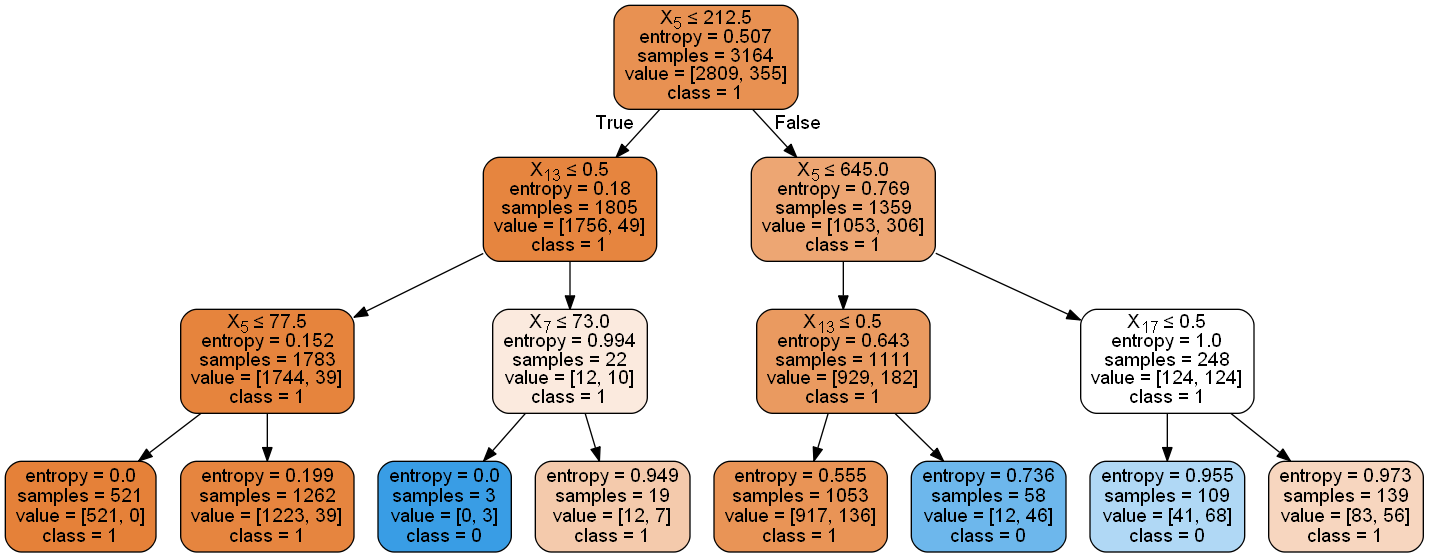

In [68]:
dot_data=StringIO()
export_graphviz(model,out_file=dot_data,filled=True,rounded=True,special_characters=True,class_names=['1','0'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('bank_png')
Image(graph.create_png())

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
lmodel=LogisticRegression()

In [72]:
lmodel=lmodel.fit(x_train,y_train)

C:\Users\kakkar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
y_test_pred=lmodel.predict(x_test)

In [75]:
metrics.accuracy_score(y_test,y_test_pred)

0.894620486366986

In [76]:
y_train_pred=lmodel.predict(x_train)

In [77]:
metrics.accuracy_score(y_train,y_train_pred)

0.9039190897597977

In [78]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      2809
           1       0.66      0.30      0.41       355

    accuracy                           0.90      3164
   macro avg       0.79      0.64      0.68      3164
weighted avg       0.89      0.90      0.89      3164



In [79]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1191
           1       0.67      0.27      0.39       166

    accuracy                           0.89      1357
   macro avg       0.79      0.63      0.66      1357
weighted avg       0.88      0.89      0.87      1357



In [80]:
from sklearn.ensemble import RandomForestClassifier
rfmodel=RandomForestClassifier()

In [81]:
rfmodel=rfmodel.fit(x_train,y_train)

C:\Users\kakkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [82]:
predtrain=rfmodel.predict(x_train)

In [83]:
metrics.accuracy_score(predtrain,y_train)

0.9889380530973452

In [84]:
predtest=rfmodel.predict(x_test)

In [85]:
metrics.accuracy_score(predtest,y_test)

0.8850405305821666